In [153]:
# imports
import pandas as pd
import numpy as np
import math
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
import statsmodels.formula.api as smf
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn import cluster
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
import matplotlib.cm as cm
import seaborn as sns

In [176]:
#loading input csv file
dataG = pd.read_csv('../GaussianClustersData.csv',header=None)
dataK = pd.DataFrame(dataG);
dataG.shape
dataG[0],dataG[1]
dataG
dataK

,0,1
0,17.9690,28.651
1,15.6310,29.014
2,16.9090,30.997
3,13.8820,36.453
4,12.9390,31.437
5,20.6510,26.662
6,18.7150,25.143
7,17.0390,30.830
8,17.0640,30.469
9,22.4050,21.928


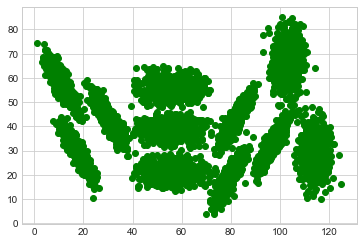

In [177]:
plt.style.use('seaborn-whitegrid')
plt.scatter(dataG[0], dataG[1], color='green')
plt.show()

In [178]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(dataG)

In [179]:
sse_k = kmeans.inertia_;
sse_k

1226034.9648687756

In [180]:
k = [3, 5, 7, 9, 11, 13, 15, 17 ,19]
sse_k = [0]*len(k);
bic_k = [0]*len(k);
sil_coeff = [0]*len(k);
for i in range(len(k)):
    #print(i,":",k[i]);
    kmeans = KMeans(n_clusters=k[i], random_state=0).fit(dataG);
    sse_k[i] = kmeans.inertia_;
    bic_k[i] = 6600*math.log(sse_k[i]/6600)+math.log(6600*k[i]*3);
    label = kmeans.labels_
    sil_coeff[i] = silhouette_score(dataG, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(k[i], sil_coeff[i]))
    #sse_k[i] = var;
bic_k
#sil_coeff

For n_clusters=3, The Silhouette Coefficient is 0.44563946308087754
For n_clusters=5, The Silhouette Coefficient is 0.47047050523127687
For n_clusters=7, The Silhouette Coefficient is 0.5029345303635323
For n_clusters=9, The Silhouette Coefficient is 0.5536957514036737
For n_clusters=11, The Silhouette Coefficient is 0.5910048142473094
For n_clusters=13, The Silhouette Coefficient is 0.551020024505578
For n_clusters=15, The Silhouette Coefficient is 0.5182608997145939
For n_clusters=17, The Silhouette Coefficient is 0.49225106622330583
For n_clusters=19, The Silhouette Coefficient is 0.4816159397945513


[38345.08199313184,
 34493.01138620023,
 30943.088763955962,
 27920.659736000427,
 24937.345772583412,
 24061.840369215894,
 23180.978819825366,
 22248.529799414846,
 21199.175768558624]

For n_clusters = 11 The average silhouette_score is : 0.5910048142473094


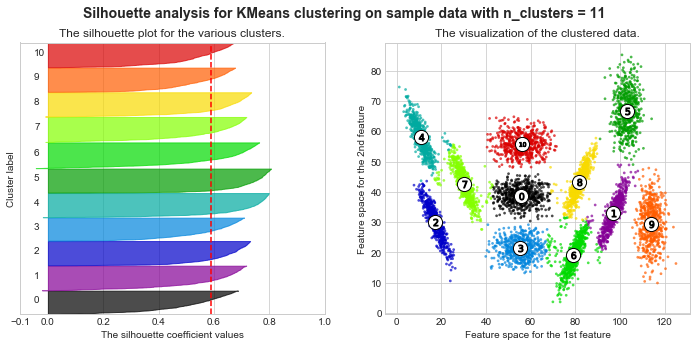

In [181]:
l=[11];
for n_clusters in l:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(12, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(dataG) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(dataG)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(dataG, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(dataG, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(dataG[0], dataG[1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [182]:
sse_k , bic_k

([2197916.389830343,
  1226034.9648687756,
  715958.7767559565,
  452886.12803022546,
  288182.23747907684,
  252374.8302387761,
  220838.09934794006,
  191738.1678454749,
  163550.34196059694],
 [38345.08199313184,
  34493.01138620023,
  30943.088763955962,
  27920.659736000427,
  24937.345772583412,
  24061.840369215894,
  23180.978819825366,
  22248.529799414846,
  21199.175768558624])

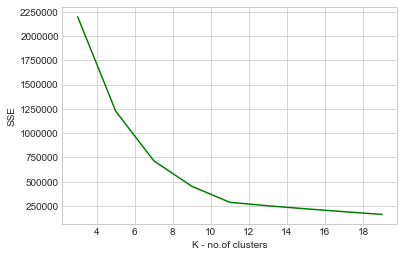

In [183]:
#plt.plot(list(sse_k.keys()), list(sse_k.values()))
plt.plot(k, sse_k, color='green')
plt.xlabel('K - no.of clusters')
plt.ylabel('SSE')
plt.show()

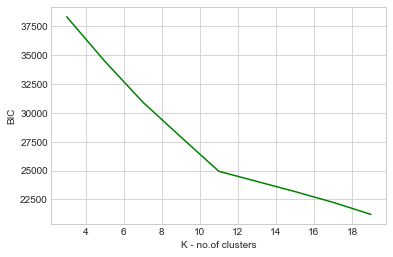

In [184]:
plt.plot(k, bic_k, color='green')
plt.xlabel('K - no.of clusters')
plt.ylabel('BIC')
plt.show()

In [185]:
kmeans_best = KMeans(n_clusters=11, random_state=0).fit(dataG);

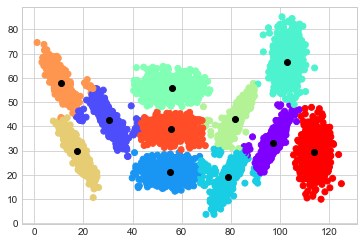

In [186]:
plt.scatter(dataG[0],dataG[1], c=kmeans_best.labels_, cmap='rainbow')
plt.scatter(kmeans_best.cluster_centers_[:,0] ,kmeans_best.cluster_centers_[:,1], color='black')

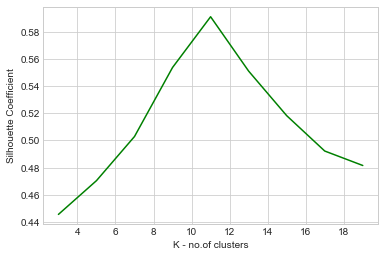

In [187]:
plt.plot(k, sil_coeff, color='green')
plt.xlabel('K - no.of clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

In [188]:
hc_single = linkage(dataK,"single")
cut = cut_tree(hc_single, n_clusters=11)
cut
dataK, dataG, cut

(             0       1
 0      17.9690  28.651
 1      15.6310  29.014
 2      16.9090  30.997
 3      13.8820  36.453
 4      12.9390  31.437
 5      20.6510  26.662
 6      18.7150  25.143
 7      17.0390  30.830
 8      17.0640  30.469
 9      22.4050  21.928
 10     18.3420  27.712
 11     16.8400  29.611
 12     16.2310  34.228
 13     16.4970  29.533
 14     22.3850  23.154
 15     18.6940  30.097
 16     13.2140  36.856
 17     11.0490  39.364
 18     13.9620  37.452
 19     16.3510  33.365
 20     14.5860  30.973
 21     17.0920  31.838
 22     17.3340  27.628
 23     20.2370  20.659
 24     18.6540  21.412
 25     15.7400  29.532
 26     15.3500  34.080
 27     16.9410  31.580
 28     21.3390  22.945
 29      9.7805  41.752
 ...        ...     ...
 6570   97.2650  73.302
 6571   98.4030  66.766
 6572   99.7040  67.336
 6573  110.4400  73.704
 6574   97.4690  71.396
 6575  102.4900  67.106
 6576  103.9000  62.983
 6577  103.1200  68.718
 6578  105.7800  67.257
 6579  103.1800 

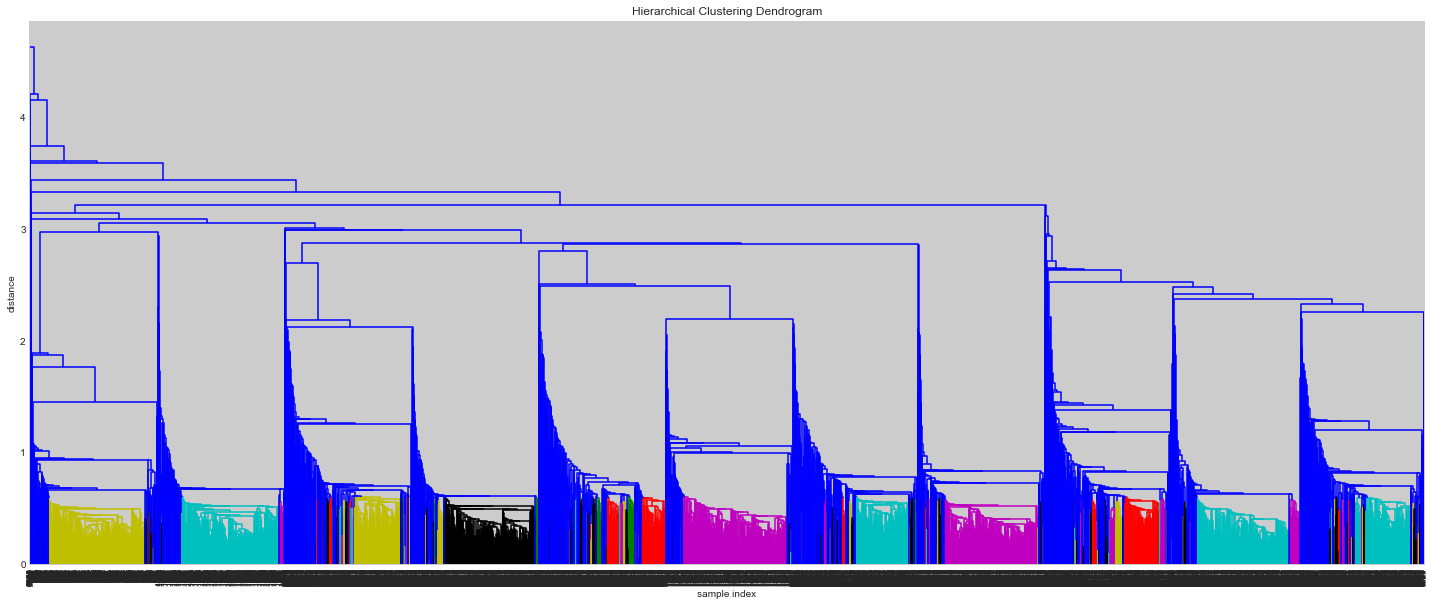

In [189]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    hc_single,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    color_threshold= .6
)
plt.show()

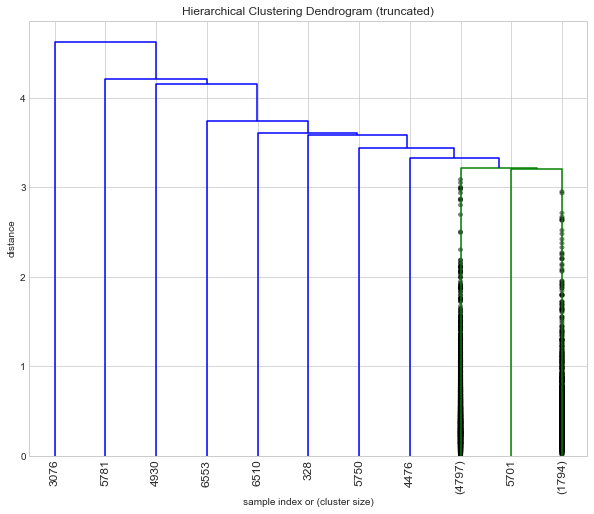

In [190]:
plt.figure(figsize=(10, 8))
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    hc_single,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=11,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [191]:
df = pd.DataFrame(cut);
df.max()

0    10
dtype: int32

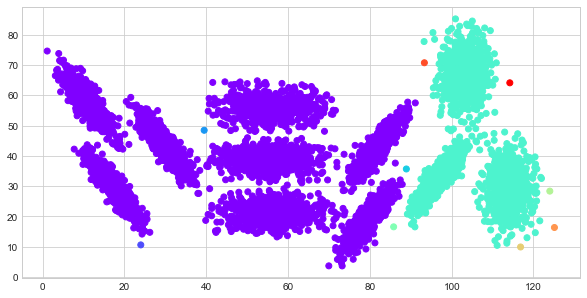

In [192]:
dataK.loc[:,2] = df.loc[:,0]
dataK
plt.figure(figsize=(10,5))
plt.scatter(dataK.iloc[:,0],dataK.iloc[:,1],c=dataK.iloc[:,2],cmap='rainbow')